Example1 - Monthly sales with diwali spikes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#generate synthetic sony tV monthly sales
np.random.seed(0)
months = pd.date_range(start='2020-01',periods=36,freq='M')
base_sales = 300 + np.random.normal(0,20,36)

/tmp/ipython-input-1848093354.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2020-01',periods=36,freq='M')


In [3]:
#add diwali spikes(oct/nov each year)
for i in range(len(months)):
  if months[i].month in [10,11]:
    base_sales[i] += 200
sales = pd.Series(base_sales,index=months)

In [4]:
#Fit ARIMA
model = ARIMA(sales,order=(1,1,1))
fit = model.fit()

In [5]:
#forecast 12 months ahead
forecast = fit.get_forecast(steps=12)
pred = forecast.predicted_mean
conf = forecast.conf_int()

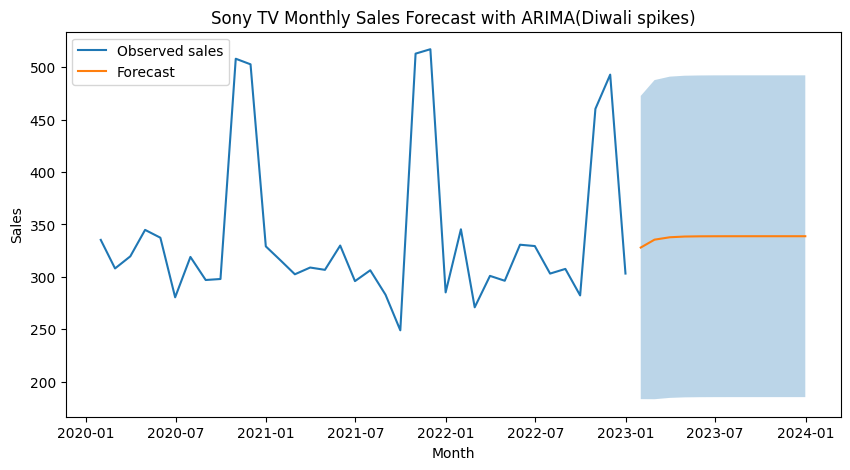

In [6]:
#plot
plt.figure(figsize=(10,5))
plt.plot(sales,label='Observed sales')
plt.plot(pred,label='Forecast')
plt.fill_between(conf.index,conf.iloc[:,0],conf.iloc[:,1],alpha=0.3)
plt.title('Sony TV Monthly Sales Forecast with ARIMA(Diwali spikes)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

Example2: Weekly sales around Diwali

In [7]:
weeks = pd.date_range(start='2021-01-01',periods=104,freq='W')
sales = 200 + np.random.normal(0, 10, 104)

In [8]:
# Add Diwali effect (week 42–45 each year)
for i in range(len(weeks)):
    if weeks[i].month in [10, 11]:
        sales[i] += 150

sales_series = pd.Series(sales, index=weeks)


In [9]:
#Fit ARIMA
model = ARIMA(sales_series, order=(2, 1, 2))
fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
# Forecast 20 weeks
forecast = fit.get_forecast(steps=20)
pred = forecast.predicted_mean
conf = forecast.conf_int()


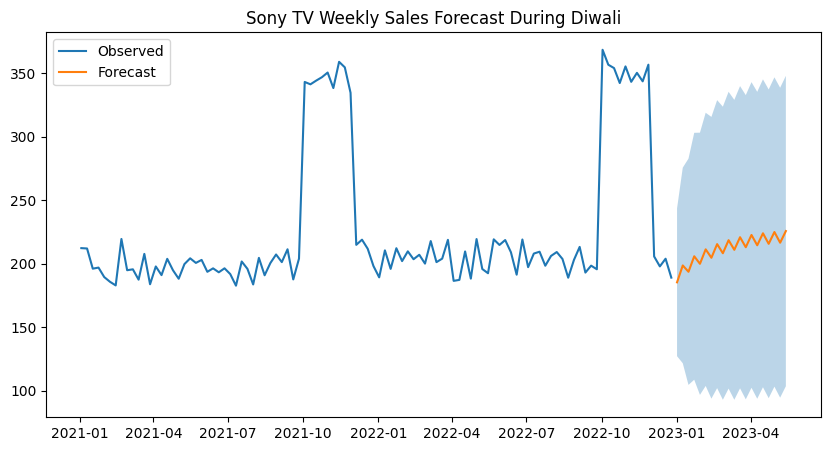

In [11]:
plt.figure(figsize=(10,5))
plt.plot(sales_series, label="Observed")
plt.plot(pred, label="Forecast")
plt.fill_between(conf.index, conf.iloc[:,0], conf.iloc[:,1], alpha=0.3)
plt.title("Sony TV Weekly Sales Forecast During Diwali")
plt.legend()
plt.show()


Example 3: Daily Sales in Diwali Month

In [12]:
days = pd.date_range("2022-09-01", periods=90, freq="D")
sales = 50 + np.random.normal(0, 5, 90)


In [13]:
# Diwali effect (20 days before festival)
sales[40:60] += 100

series = pd.Series(sales, index=days)


In [14]:
# Fit ARIMA
model = ARIMA(series, order=(1,1,1))
fit = model.fit()

forecast = fit.get_forecast(steps=30)
pred = forecast.predicted_mean
conf = forecast.conf_int()


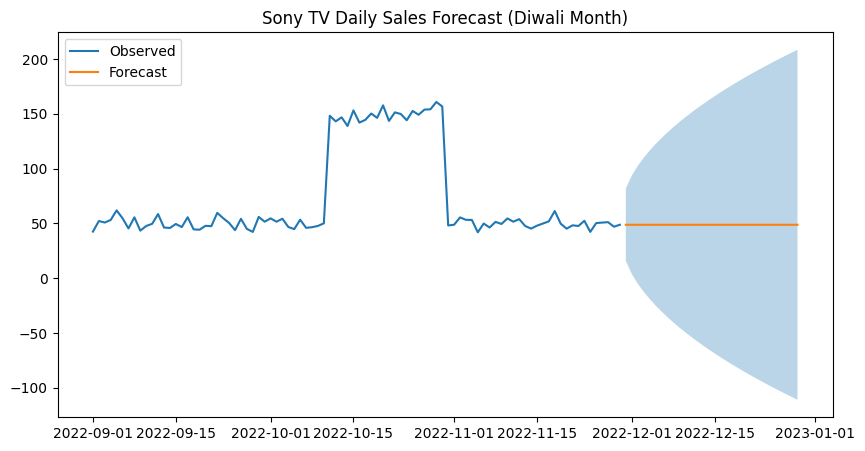

In [15]:
plt.figure(figsize=(10,5))
plt.plot(series, label="Observed")
plt.plot(pred, label="Forecast")
plt.fill_between(conf.index, conf.iloc[:,0], conf.iloc[:,1], alpha=0.3)
plt.title("Sony TV Daily Sales Forecast (Diwali Month)")
plt.legend()
plt.show()


Example 4: Yearly Sales with Festival Growth Trend

In [16]:
years = pd.date_range("2010", periods=12, freq="Y")
sales = 1000 + 50*np.arange(12) + np.random.normal(0,50,12)


/tmp/ipython-input-3076568594.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range("2010", periods=12, freq="Y")


In [17]:
# Diwali contribution grows each year
sales[::1] += np.linspace(100, 400, 12)
series = pd.Series(sales, index=years)


In [18]:
# Fit ARIMA
model = ARIMA(series, order=(1,1,1))
fit = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
forecast = fit.get_forecast(steps=5)
pred = forecast.predicted_mean
conf = forecast.conf_int()

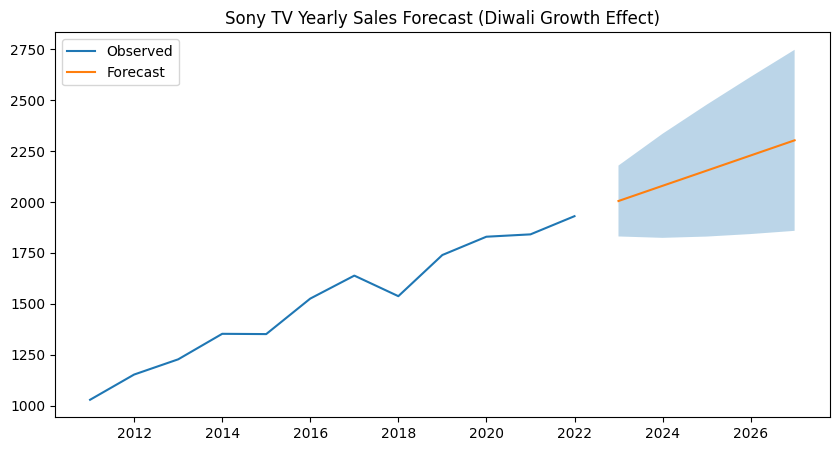

In [20]:
plt.figure(figsize=(10,5))
plt.plot(series, label="Observed")
plt.plot(pred, label="Forecast")
plt.fill_between(conf.index, conf.iloc[:,0], conf.iloc[:,1], alpha=0.3)
plt.title("Sony TV Yearly Sales Forecast (Diwali Growth Effect)")
plt.legend()
plt.show()


Example 5: Comparing Pre- and Post-Diwali Sales

In [21]:
months = pd.date_range("2018-01", periods=60, freq="M")
sales = 300 + np.random.normal(0, 15, 60)


/tmp/ipython-input-3923019289.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range("2018-01", periods=60, freq="M")


In [22]:
# Add sharp Diwali spikes
for i in range(len(months)):
    if months[i].month == 10:
        sales[i] += 250

series = pd.Series(sales, index=months)


In [23]:
# Fit ARIMA
model = ARIMA(series, order=(2,1,1))
fit = model.fit()


In [24]:
forecast = fit.get_forecast(steps=12)
pred = forecast.predicted_mean
conf = forecast.conf_int()


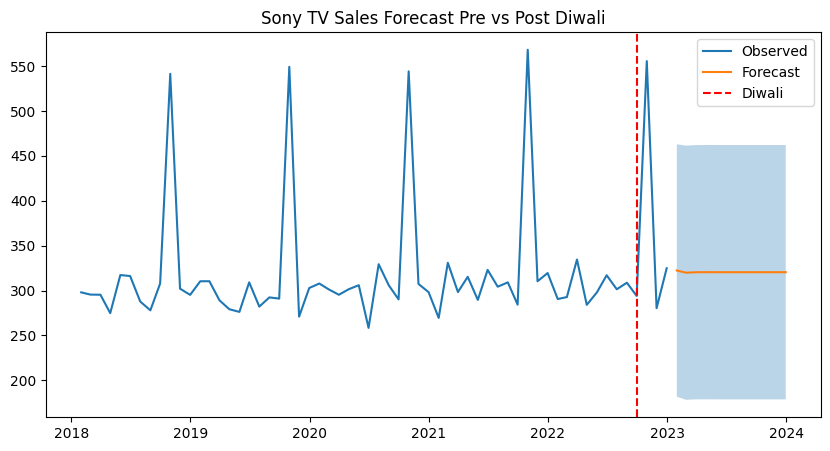

In [25]:
plt.figure(figsize=(10,5))
plt.plot(series, label="Observed")
plt.plot(pred, label="Forecast")
plt.fill_between(conf.index, conf.iloc[:,0], conf.iloc[:,1], alpha=0.3)
plt.axvline(x=pd.to_datetime("2022-10-01"), color="red", linestyle="--", label="Diwali")
plt.title("Sony TV Sales Forecast Pre vs Post Diwali")
plt.legend()
plt.show()